# Тестирование Алгоритмов

In [4]:
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import deque
import math
from decimal import Decimal
import seaborn as sns

In [5]:
class Regression:
    n = 20
    a = n
    shift = 0
    pointX = deque([1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1],maxlen= n)
    pointY = deque([1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1],maxlen= n)
    timeStep = deque([0,1,2,3,4, 5,6,7,8,9, 10,11,12,13,14, 15,16,17,18,19], maxlen = n)
    past_x = 0
    past_y = 0
    Bx_past = np.array([0, 0, 0]).reshape(3,1)
    By_past = np.array([0, 0, 0]).reshape(3,1)

    def predict(self, x, y):
        print('')

        #Защита от пропусков значений
        if np.isnan(x) | np.isnan(y) == True:
            x = int(np.round(self.past_x))
            y = int(np.round(self.past_y))
        self.pointX.append(x)
        print(self.pointX)
        print(self.timeStep)
        self.pointY.append(y)
        print('Y',self.pointY)
        self.shift=self.shift +1
        #Update timestepList
        self.timeStep.append(self.a)

        self.a+=1
        print('a', self.a)
        t11 = self.n
        t12 = np.sum( self.timeStep)
        t13 = np.sum(np.power( self.timeStep, 2, dtype = 'int64'))

        t21 = t12
        t22 = t13
        t23 = np.sum(np.power( self.timeStep, 3, dtype = 'int64'))

        t31 = t22
        t32 = t23
        t33 = np.sum(np.power( self.timeStep, 4, dtype = 'int64'))

        T = np.array([[t11, t12, t13],
                      [t21, t22, t23],
                      [t31, t32, t33]], dtype = 'int64')




        x11 = sum(self.pointX)
        x12 = sum(self.timeStep * np.array(self.pointX))
        x13 = sum(np.power(self.timeStep,2) * np.array(self.pointX))

        y11 = sum(self.pointY)
        y12 = sum(self.timeStep * np.array(self.pointY))
        y13 = sum(np.power(self.timeStep,2) * np.array(self.pointY))

        X = np.array([x11,
                      x12,
                      x13]).reshape((3,1))

        Y = np.array([y11,
                      y12,
                      y13]).reshape((3, 1))

        
        Bx = np.linalg.inv(T) @ X
   
        By = np.linalg.inv(T) @ Y
        self.Bx_past = Bx
        self.By_past = By
        #Filtering
        print('Bx', Bx)
        print('By', By)

        #drawing
#         if Bx[2] < 10**-5:
#             Bx[0] = self.pointX[0]
#             stepX =self.n
#         else:
#             Bx[1] = Bx[1] - 2*(self.shift-self.n)
#             Bx[0] = Bx[0] - (self.shift-self.n)**2
#             stepX = self.shift
        
#         if By[2] < 10**-5:
#             By[0] = self.pointY[0]
#             stepY =self.n
#         else:
#             By[1] = By[1] - 2*(self.shift-self.n)
#             By[0] = By[0] - (self.shift-self.n)**2
#             stepY= self.shift
      
     
        self.x_predict = Bx[0] + Bx[1] * (self.a) + Bx[2] * (self.a) ** 2
        self.y_predict = By[0] + By[1] * (self.a)+ By[2] * (self.a)** 2
        self.past_x = self.x_predict
        self.past_y = self.y_predict
        
        
        return np.array([int(np.round(self.x_predict)), int(np.round(self.y_predict))])

# 1.Оценка точности предсказания  регрессии 

# 1.1Regression|Clear|Parabolic

In [6]:
rg = Regression()

In [7]:
Paraboloic = pd.read_csv('D:/LETI/Course 6/Diplom/Compile_Calman+Tracker/Trajectories/Paraboloic.csv')

In [8]:
Paraboloic[40:60] = np.nan

<IPython.core.display.Javascript object>


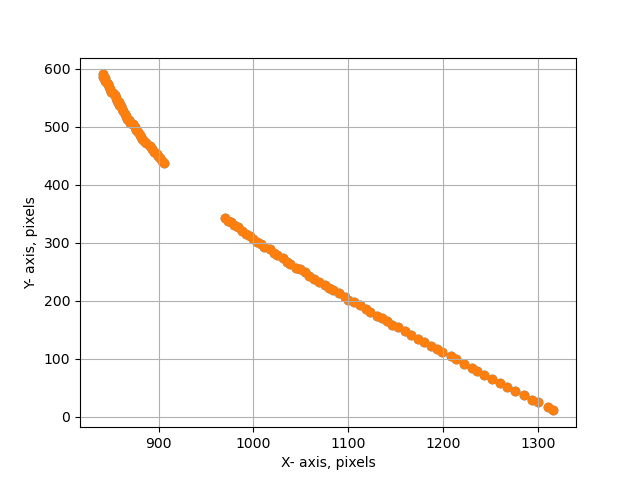

Text(0, 0.5, 'Y- axis, pixels')

In [9]:
plt.scatter(Paraboloic['x0'], Paraboloic['y0'])
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')

In [43]:
plt.scatter(Paraboloic['x0'], Paraboloic['y0'])

In [44]:
Predicted = pd.DataFrame([[0, 0]],columns = ['x0_pred', 'y0_pred'])

In [12]:
rg = Regression()
for i in range(0, len(Paraboloic)-1,1):
    Predicted.loc[ len(Predicted.index )] = (rg.predict(Paraboloic['x0'][i],Paraboloic['y0'][i]))

    


deque([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 841.0], maxlen=20)
deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], maxlen=20)
Y deque([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 590.0], maxlen=20)
a 21
Bx [[127.        ]
 [-45.27272727]
 [  2.72727273]]
By [[ 89.35      ]
 [-31.74480519]
 [  1.91233766]]

deque([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 841.0, 842.0], maxlen=20)
deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], maxlen=20)
Y deque([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 590.0, 586.0], maxlen=20)
a 22
Bx [[278.47030075]
 [-82.96948052]
 [  4.59654819]]
By [[194.58571429]
 [-57.89350649]
 [  3.20779221]]

deque([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 841.0, 842.0, 844.0], maxlen=20)
deque([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], maxlen=20)
Y deque([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 590.0, 586.0, 

In [13]:
Predicted.shape

(121, 2)

In [14]:
Match = pd.concat([Paraboloic, Predicted], axis = 1, join='inner')

Ошибка RMSE

In [15]:
MSE = (Match['x0'] - Match['x0_pred'])**2
RMSE = np.mean(np.sqrt(MSE[21:]))
print('RMSE' , RMSE)

RMSE 0.7625


<IPython.core.display.Javascript object>


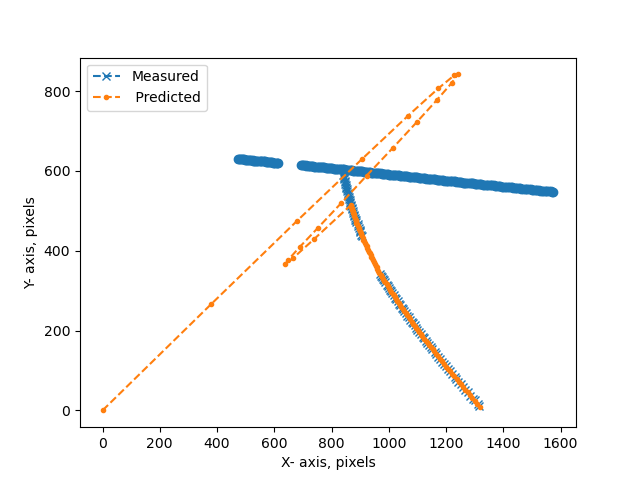

In [16]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Match['x0'], Match['y0'], '--x',label = 'Measured')
ax.plot(Match['x0_pred'], Match['y0_pred'], '--.', label = ' Predicted')
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')
ax.legend()
#plt.plot(Src_Pred['x1'], Src_Pred['y1'])


# 1.2Regression|Clear|Linear

In [45]:
Linear = pd.read_csv('D:/LETI/Course 6/Diplom/Compile_Calman+Tracker/Trajectories/Linear.csv')

In [46]:
Linear[40:60] = np.nan

In [19]:
plt.scatter(Linear['x0'], Linear['y0'])
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')

Text(0, 0.5, 'Y- axis, pixels')

In [20]:
Predicted = pd.DataFrame([[0, 0]],columns = ['x0_pred', 'y0_pred'])

In [21]:
rg = Regression()
for i in range(0, len(Linear)-1,1):
    Predicted.loc[ len(Predicted.index )] = (rg.predict(Linear['x0'][i],Linear['y0'][i]))

    


deque([1173.0, 1180.0, 1187.0, 1193.0, 1199.0, 1208.0, 1213.0, 1222.0, 1230.0, 1235.0, 1243.0, 1251.0, 1260.0, 1267.0, 1275.0, 1285.0, 1293.0, 1300.0, 1310.0, 474.0], maxlen=20)
deque([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139], maxlen=20)
Y deque([134.0, 129.0, 122.0, 116.0, 111.0, 104.0, 99.0, 91.0, 84.0, 79.0, 72.0, 65.0, 59.0, 51.0, 45.0, 37.0, 29.0, 25.0, 16.0, 630.0], maxlen=20)
a 21
Bx [[3.50302618e+02]
 [6.07209042e+00]
 [5.81377493e-03]]
By [[ 6.93629240e+02]
 [-2.90018374e+00]
 [-1.41370736e-02]]

deque([1180.0, 1187.0, 1193.0, 1199.0, 1208.0, 1213.0, 1222.0, 1230.0, 1235.0, 1243.0, 1251.0, 1260.0, 1267.0, 1275.0, 1285.0, 1293.0, 1300.0, 1310.0, 474.0, 476.0], maxlen=20)
deque([121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 20], maxlen=20)
Y deque([129.0, 122.0, 116.0, 111.0, 104.0, 99.0, 91.0, 84.0, 79.0, 72.0, 65.0, 59.0, 51.0, 45.0, 37.0, 29.0, 25.0, 16.0, 630.0, 630.0

In [22]:
Predicted.head(60)

x0_pred  y0_pred
0         0        0
1       480      626
2       484      625
3       489      623
4       494      621
5       498      619
6       503      618
7       507      617
8       511      616
9       513      616
10      515      617
11      518      619
12      520      621
13      523      622
14      526      623
15      529      623
16      532      623
17      536      623
18      540      622
19      543      622
20      545      625
21      548      625
22      552      625
23      555      624
24      559      624
25      562      624
26      566      624
27      570      623
28      574      623
29      578      623
30      581      623
31      585      622
32      588      622
33      592      622
34      596      622
35      600      621
36      604      621
37      608      621
38      612      620
39      615      620
40      619      620
41      623      620
42      626      620
43      630      620
44      634      620
45      638      620
46      642      620
47      645      620
48      649      620
49      653      620
50      657      620
51      661      620
52      665      620
53      669      620
54      673      620
55      677      620
56      681      620
57      685      620
58      689      620
59      693      620

In [23]:
Match = pd.concat([Linear, Predicted], axis = 1, join='inner')

In [24]:
MSE = (Match['x0'] - Match['x0_pred'])**2
RMSE = np.mean(np.sqrt(MSE[21:]))
print('RMSE' , RMSE)

RMSE 0.5662100456621004


<IPython.core.display.Javascript object>


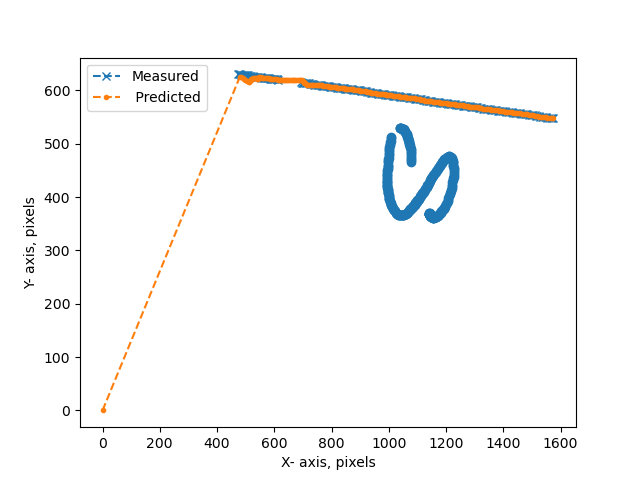

In [25]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Match['x0'], Match['y0'], '--x',label = 'Measured')
ax.plot(Match['x0_pred'], Match['y0_pred'], '--.', label = ' Predicted')
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')
ax.legend()
#plt.plot(Src_Pred['x1'], Src_Pred['y1'])

# 1.3Regression|Clear|Complex

In [47]:
Complex = pd.read_csv('D:/LETI/Course 6/Diplom/Compile_Calman+Tracker/Trajectories/Complex.csv')

In [48]:
Complex[40:60] = np.nan

In [49]:
plt.scatter(Complex['x0'], Complex['y0'])
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')



Text(0, 0.5, 'Y- axis, pixels')

In [29]:
Predicted = pd.DataFrame([[0, 0]],columns = ['x0_pred', 'y0_pred'])

In [30]:
rg = Regression()
for i in range(0, len(Complex)-1,1):
    Predicted.loc[ len(Predicted.index )] = (rg.predict(Complex['x0'][i],Complex['y0'][i]))



deque([1479.0, 1484.0, 1489.0, 1495.0, 1500.0, 1504.0, 1509.0, 1514.0, 1519.0, 1524.0, 1529.0, 1536.0, 1540.0, 1544.0, 1549.0, 1554.0, 1561.0, 1565.0, 1570.0, 1079.0], maxlen=20)
deque([259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278], maxlen=20)
Y deque([555.0, 555.0, 554.0, 554.0, 553.0, 553.0, 553.0, 552.0, 552.0, 552.0, 551.0, 551.0, 550.0, 550.0, 550.0, 549.0, 549.0, 549.0, 548.0, 466.0], maxlen=20)
a 21
Bx [[ 1.11366351e+03]
 [-1.99504409e+00]
 [ 1.30883279e-02]]
By [[ 4.43545942e+02]
 [ 1.18064691e+00]
 [-2.89484969e-03]]

deque([1484.0, 1489.0, 1495.0, 1500.0, 1504.0, 1509.0, 1514.0, 1519.0, 1524.0, 1529.0, 1536.0, 1540.0, 1544.0, 1549.0, 1554.0, 1561.0, 1565.0, 1570.0, 1079.0, 1079.0], maxlen=20)
deque([260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 20], maxlen=20)
Y deque([555.0, 554.0, 554.0, 553.0, 553.0, 553.0, 552.0, 552.0, 552.0, 551.0, 551.0, 550.0, 550.0, 550.0, 549.0, 5

In [31]:
Predicted.head(60)

x0_pred  y0_pred
0         0        0
1      1078      467
2      1077      469
3      1076      471
4      1075      473
5      1075      476
6      1074      478
7      1073      481
8      1073      484
9      1073      487
10     1073      491
11     1073      494
12     1073      498
13     1072      501
14     1072      504
15     1071      507
16     1070      509
17     1069      511
18     1068      514
19     1068      515
20     1064      514
21     1063      516
22     1061      518
23     1060      519
24     1059      521
25     1057      522
26     1056      523
27     1055      524
28     1054      525
29     1052      526
30     1051      527
31     1049      527
32     1048      528
33     1046      528
34     1045      529
35     1043      529
36     1042      529
37     1040      529
38     1039      529
39     1037      529
40     1036      529
41     1034      528
42     1033      528
43     1031      527
44     1029      527
45     1028      526
46     1026      525
47     1024      524
48     1023      523
49     1021      522
50     1019      521
51     1017      519
52     1015      518
53     1013      516
54     1011      514
55     1009      513
56     1007      511
57     1005      509
58     1003      507
59     1001      505

In [32]:
Match = pd.concat([Complex, Predicted], axis = 1, join='inner')

In [33]:
MSE = (Match['x0'] - Match['x0_pred'])**2
RMSE = np.mean(np.sqrt(MSE[21:]))
print('RMSE' , RMSE)

RMSE 0.7388059701492538


<IPython.core.display.Javascript object>


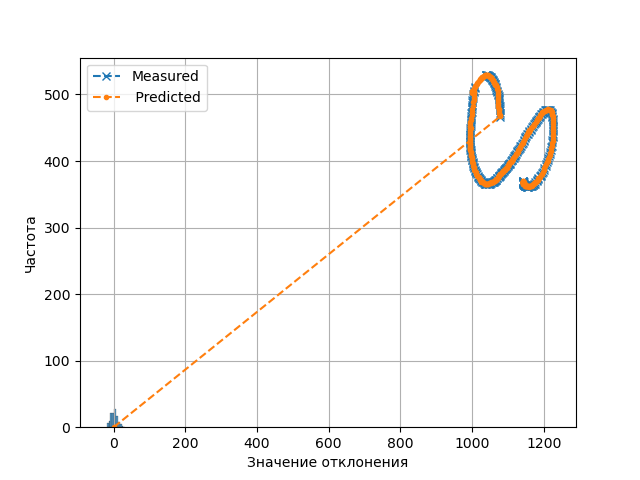

In [34]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Match['x0'], Match['y0'], '--x',label = 'Measured')
ax.plot(Match['x0_pred'], Match['y0_pred'], '--.', label = ' Predicted')
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')
ax.legend()
#plt.plot(Src_Pred['x1'], Src_Pred['y1'])

# 1.4Regression|Sigma = 10|Parabolic

In [50]:
Paraboloic = pd.read_csv('D:/LETI/Course 6/Diplom/Compile_Calman+Tracker/Trajectories/Paraboloic.csv')

In [36]:
Predicted = pd.DataFrame([[0, 0]],columns = ['x0_pred', 'y0_pred'])

In [37]:
NoiseX = np.random.normal(0, np.sqrt(100), (len(Paraboloic)))
NoiseY = np.random.normal(0, np.sqrt(100), (len(Paraboloic)))
Xnoise = Paraboloic['x0']+ NoiseX
Ynoise = Paraboloic['y0']+ NoiseY
ParabolicNoise = pd.concat([Xnoise, Ynoise], axis = 1, join='inner')

In [38]:
sns_plot = sns.histplot(NoiseX)
snsplot = sns.kdeplot(NoiseX, shade=True)
sns_plot.set (xlabel='Значение отклонения',
 ylabel='Частота')


[Text(0.5, 0, 'Значение отклонения'), Text(0, 0.5, 'Частота')]

In [39]:
rg = Regression()
for i in range(0, len(ParabolicNoise)-1,1):
    Predicted.loc[ len(Predicted.index )] = (rg.predict(ParabolicNoise['x0'][i],ParabolicNoise['y0'][i]))



deque([1144.0, 1144.0, 1144.0, 1143.0, 1143.0, 1143.0, 1142.0, 1143.0, 1142.0, 1142.0, 1142.0, 1143.0, 1142.0, 1142.0, 1142.0, 1143.0, 1142.0, 1143.0, 1144.0, 857.5223118328969], maxlen=20)
deque([308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327], maxlen=20)
Y deque([364.0, 365.0, 366.0, 366.0, 367.0, 366.0, 368.0, 367.0, 368.0, 369.0, 368.0, 369.0, 368.0, 369.0, 370.0, 370.0, 369.0, 369.0, 369.0, 593.4898743322551], maxlen=20)
a 21
Bx [[ 8.16817534e+02]
 [ 2.10321301e+00]
 [-3.38938643e-03]]
By [[ 6.30509543e+02]
 [-1.91991532e+00]
 [ 3.43793181e-03]]

deque([1144.0, 1144.0, 1143.0, 1143.0, 1143.0, 1142.0, 1143.0, 1142.0, 1142.0, 1142.0, 1143.0, 1142.0, 1142.0, 1142.0, 1143.0, 1142.0, 1143.0, 1144.0, 857.5223118328969, 839.7867524459065], maxlen=20)
deque([309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 20], maxlen=20)
Y deque([365.0, 366.0, 366.0, 367.0, 366.0, 368.0, 367.0, 368.0, 369.0

In [40]:
Match = pd.concat([ParabolicNoise, Predicted], axis = 1, join='inner')

In [41]:
MSE = (Match['x0'] - Match['x0_pred'])**2
RMSE = np.mean(np.sqrt(MSE[21:]))
print('RMSE' , RMSE)

RMSE 10.282818846377292


<IPython.core.display.Javascript object>


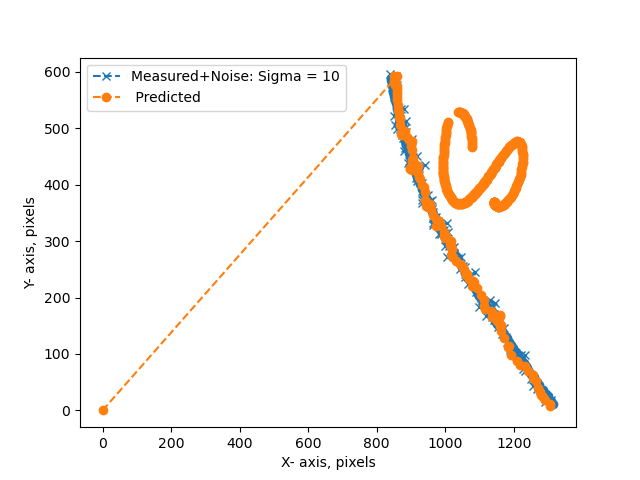

In [42]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Match['x0'], Match['y0'], '--x',label = 'Measured+Noise: Sigma = 10')
ax.plot(Match['x0_pred'], Match['y0_pred'], '--o', label = ' Predicted')
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')
ax.legend()
#plt.plot(Src_Pred['x1'], Src_Pred['y1'])

# 1.5Regression|Sigma = 10|Linear

In [51]:
Linear = pd.read_csv('D:/LETI/Course 6/Diplom/Compile_Calman+Tracker/Trajectories/Linear.csv')

In [52]:
Predicted = pd.DataFrame([[0, 0]],columns = ['x0_pred', 'y0_pred'])

In [53]:
NoiseX = np.random.normal(0, np.sqrt(100), (len(Linear)))
NoiseY = np.random.normal(0, np.sqrt(100), (len(Linear)))
Xnoise = Linear['x0']+ NoiseX
Ynoise = Linear['y0']+ NoiseY
LinearNoise = pd.concat([Xnoise, Ynoise], axis = 1, join='inner')

In [54]:
rg = Regression()
for i in range(0, len(LinearNoise)-1,1):
    Predicted.loc[ len(Predicted.index )] = (rg.predict(LinearNoise['x0'][i],LinearNoise['y0'][i]))



deque([1164.7674364442303, 1180.9066148062477, 1188.1657296786987, 1176.7146311392037, 1190.4287831402662, 1221.85494549863, 1207.6572779546616, 1234.0190426170686, 1227.1994027042695, 1239.5831273197607, 1233.2171337393138, 1250.7161353267804, 1256.5977601433362, 1267.4287143006104, 1271.2291795205272, 1278.2284109365482, 1282.8828471031904, 1307.4614574894422, 1292.643379916885, 480.2557603403005], maxlen=20)
deque([120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139], maxlen=20)
Y deque([135.43616934738537, 120.57659046852726, 109.90089799147877, 130.14468257105634, 106.43512499699455, 97.4305549930949, 96.15839084453805, 97.9858809244586, 73.05220131776018, 73.83796699001527, 69.38229454023892, 56.15300153423087, 42.80166026498907, 38.09050603168426, 41.5394379537106, 33.59211338271511, 29.384718757519053, 18.770310769240382, 15.739888794061587, 622.1265439792793], maxlen=20)
a 21
Bx [[3.55012675e+02]
 [6.16722074e+00]
 [4.64285598e-0

In [55]:
Match = pd.concat([LinearNoise, Predicted], axis = 1, join='inner')

In [56]:
MSE = (Match['x0'] - Match['x0_pred'])**2
RMSE = np.mean(np.sqrt(MSE[21:]))
print('RMSE' , RMSE)

RMSE 10.197872927155732


<IPython.core.display.Javascript object>


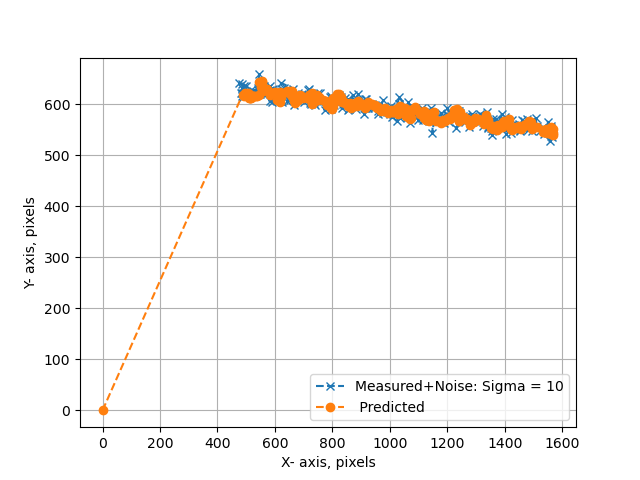

In [57]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Match['x0'], Match['y0'], '--x',label = 'Measured+Noise: Sigma = 10')
ax.plot(Match['x0_pred'], Match['y0_pred'], '--o', label = ' Predicted')
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')
ax.legend()
#plt.plot(Src_Pred['x1'], Src_Pred['y1'])

# 1.6Regression|Sigma = 10|Complex

In [59]:
Complex = pd.read_csv('D:/LETI/Course 6/Diplom/Compile_Calman+Tracker/Trajectories/Complex.csv')

In [60]:
Predicted = pd.DataFrame([[0, 0]],columns = ['x0_pred', 'y0_pred'])

In [61]:
NoiseX = np.random.normal(0, np.sqrt(100), (len(Complex)))
NoiseY = np.random.normal(0, np.sqrt(100), (len(Complex)))
Xnoise = Complex['x0']+ NoiseX
Ynoise = Complex['y0']+ NoiseY
ComplexNoise = pd.concat([Xnoise, Ynoise], axis = 1, join='inner')

In [62]:
rg = Regression()
for i in range(0, len(ComplexNoise)-1,1):
    Predicted.loc[ len(Predicted.index )] = (rg.predict(ComplexNoise['x0'][i],ComplexNoise['y0'][i]))


deque([1475.9978644086675, 1484.4047597501467, 1480.5741085988057, 1486.4724933481791, 1493.119475407676, 1506.6994649330436, 1513.066873266286, 1549.1163644511173, 1522.0011866330187, 1511.324645110377, 1536.7934339331716, 1534.4996831942772, 1558.8864989012761, 1549.1302469380446, 1560.3918250237452, 1558.1779568369518, 1552.6107081899981, 1543.9704696655072, 1559.029618250932, 1105.3488724065382], maxlen=20)
deque([259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278], maxlen=20)
Y deque([571.0141675290123, 554.9614671707462, 549.2454172623688, 555.0627843403221, 547.129387149765, 573.0260636347359, 551.7232291591748, 543.0015144895199, 548.5615404392173, 556.5905037582465, 554.3220900755717, 541.3471490333823, 558.2761090787033, 566.0217753463294, 536.9298334917161, 527.8239781683327, 554.4470509470734, 544.927685893799, 553.5640453911742, 470.2608989581502], maxlen=20)
a 21
Bx [[ 1.14037419e+03]
 [-2.00956142e+00]
 [ 1.27815247e-02]]


In [63]:
Match = pd.concat([ComplexNoise, Predicted], axis = 1, join='inner')

In [64]:
MSE = (Match['x0'] - Match['x0_pred'])**2
RMSE = np.mean(np.sqrt(MSE[21:]))
print('RMSE' , RMSE)

RMSE 9.550993987304572


<IPython.core.display.Javascript object>


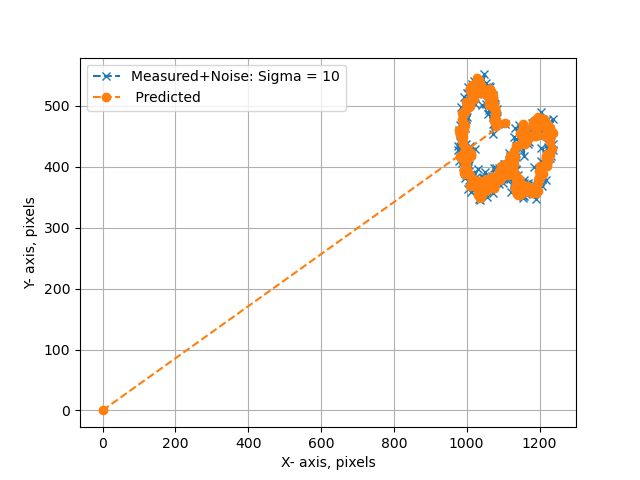

In [65]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Match['x0'], Match['y0'], '--x',label = 'Measured+Noise: Sigma = 10')
ax.plot(Match['x0_pred'], Match['y0_pred'], '--o', label = ' Predicted')
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')
ax.legend()
#plt.plot(Src_Pred['x1'], Src_Pred['y1'])

# 2.1Kalman Filter|Clear|Parabolic

In [67]:
class KF:
    fps = 25
    dt = 1 
    ux = 1
    uy = 1
    sigma_a = 1
    sigma_x = 0.1
    sigma_y = 0.1
    F = np.array([[1, 0, dt, 0],
                  [0, 1, 0, dt],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    B = np.array([[0.5 * (dt ** 2), 0],
                  [0, 0.5 * (dt ** 2)],
                  [dt, 0],
                  [0, dt]])
 
    Q = np.array([[(dt ** 4) / 4, 0, (dt ** 3) / 2, 0],
                  [0, (dt ** 4) / 4, 0, (dt ** 3) / 2],
                  [(dt ** 3) / 2, 0, (dt ** 2), 0],
                  [0, (dt ** 3) / 2, 0, (dt ** 2)]]) * sigma_a ** 2  # по сути ускорение
    P = np.array([[1000, 0, 0, 0],
                  [0, 1000, 0, 0],
                  [0, 0, 1000, 0],
                  [0, 0, 0, 1000]])   # Матрица ковариации
    R = np.array([[sigma_x ** 2, 0],
                  [0, sigma_y ** 2]])
    H = np.array([[1, 0, 0, 0],
                  [0, 1, 0, 0]])
    u = np.array([ux, uy]).reshape((2, 1))
    vel = np.array([1, 1]).reshape((2, 1))
    velpast = np.array([1, 1]).reshape((2, 1))
    zk = np.array([0, 0]).reshape((2, 1))
    xk = np.array([0., 0., 0., 0.]).reshape((4, 1))
    xkpast = np.array([0., 0., 0., 0.]).reshape((4, 1))

    def predict(self):
        # prediction
        self.xk = self.F @ self.xk + self.B @ self.u
        self.P = self.F @ self.P @ self.F.T + self.Q
        x, y = int(self.xk[0]), int(self.xk[1])
        return np.array([int(x), int(y)])
    

    def update(self, coordX, coordY):
        if np.isnan(coordX) | np.isnan(coordY) == True:
            return
        self.zk[0] = coordX  # X
        self.zk[1] = coordY  # Y
#         self.vel[0] = (self.zk[0] - self.xkpast[0]) /  self.dt  # velocityX
#         self.vel[1] = (self.zk[1] - self.xkpast[1]) /  self.dt  # velocityY
#         self.u[0] = (self.vel[0] - self.velpast[0]) /  self.dt  # accelerationX
#         self.u[1] = (self.vel[1] - self.velpast[1]) /  self.dt  # accelerationY

        # self.point_current[0] = coordX
        # self.point_current[1] = coordY
        self.yk = self.zk - self.H @ self.xk
        self.Sk = self.H @ self.P @ self.H.T + self.R
        self.K = self.P @ self.H.T @ np.linalg.inv(self.Sk)
    
        # update variables
        I = np.eye(self.H.shape[1])

        self.xk = self.xk + self.K @ self.yk
        self.P = (I - (self.K @ self.H)) @ self.P 
#         self.xkpast[1] = self.xk[1]
#         self.velpast[0] = self.vel[0]
#         self.velpast[1] = self.vel[1]

In [68]:
kf = KF()

In [69]:
Paraboloic = pd.read_csv('D:/LETI/Course 6/Diplom/Compile_Calman+Tracker/Trajectories/Paraboloic.csv')

In [70]:
Paraboloic[40:60] = np.nan

In [71]:
Paraboloic.head(60)

x0     y0
0   841.0  590.0
1   842.0  586.0
2   844.0  583.0
3   844.0  579.0
4   846.0  576.0
5   847.0  573.0
6   848.0  568.0
7   849.0  565.0
8   850.0  560.0
9   852.0  558.0
10  854.0  554.0
11  855.0  550.0
12  856.0  545.0
13  858.0  542.0
14  858.0  538.0
15  860.0  535.0
16  862.0  531.0
17  863.0  527.0
18  865.0  522.0
19  866.0  519.0
20  867.0  514.0
21  869.0  511.0
22  870.0  507.0
23  873.0  504.0
24  875.0  499.0
25  876.0  494.0
26  878.0  490.0
27  880.0  486.0
28  882.0  482.0
29  883.0  478.0
30  885.0  476.0
31  887.0  471.0
32  891.0  467.0
33  893.0  461.0
34  895.0  457.0
35  898.0  453.0
36  899.0  449.0
37  901.0  446.0
38  904.0  440.0
39  906.0  437.0
40    NaN    NaN
41    NaN    NaN
42    NaN    NaN
43    NaN    NaN
44    NaN    NaN
45    NaN    NaN
46    NaN    NaN
47    NaN    NaN
48    NaN    NaN
49    NaN    NaN
50    NaN    NaN
51    NaN    NaN
52    NaN    NaN
53    NaN    NaN
54    NaN    NaN
55    NaN    NaN
56    NaN    NaN
57    NaN    NaN
58    NaN    NaN
59    NaN    NaN

In [72]:
Predicted = pd.DataFrame([[0, 0]],columns = ['x0_pred', 'y0_pred'])

In [73]:
for i in range(0, len(Paraboloic)-1,1):
    Predicted.loc[ len(Predicted.index )] = kf.predict()
    kf.update(Paraboloic['x0'][i],Paraboloic['y0'][i])


    


In [74]:
Predicted

x0_pred  y0_pred
0          0        0
1          0        0
2       1262      886
3        843      582
4        847      581
..       ...      ...
116     1273       42
117     1284       40
118     1296       28
119     1300       22
120     1307       23

[121 rows x 2 columns]

In [75]:
Match = pd.concat([Paraboloic, Predicted], axis = 1, join='inner')

In [76]:
xMSE = (Match['x0'] - Match['x0_pred'])**2
yMSE = (Match['y0'] - Match['y0_pred'])**2

In [77]:
xRMSE = np.mean(np.sqrt(xMSE[21:]))
yRMSE = np.mean(np.sqrt(xMSE[21:]))
print('RMSE X-axis', xRMSE)
print('RMSE Y-axis', yRMSE)
print('RMSE' , (xRMSE + yRMSE)/2)

RMSE X-axis 9.225
RMSE Y-axis 9.225
RMSE 9.225


<IPython.core.display.Javascript object>


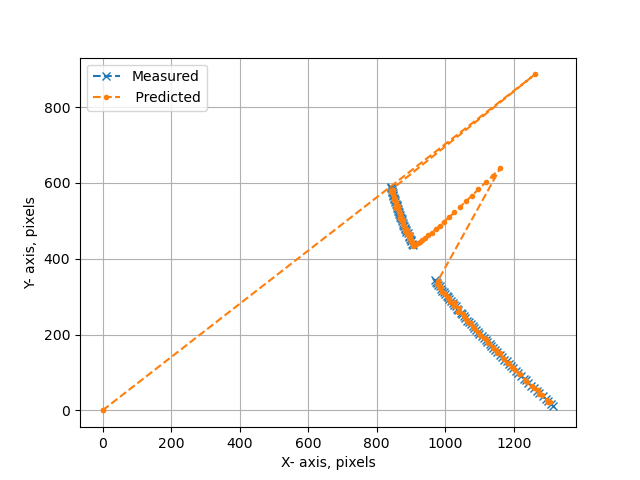

In [78]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Match['x0'], Match['y0'], '--x',label = 'Measured')
ax.plot(Match['x0_pred'], Match['y0_pred'], '--.', label = ' Predicted')
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')
ax.legend()
#plt.plot(Src_Pred['x1'], Src_Pred['y1'])

# 2.2Kalman Filter|Clear|Linear


In [79]:
Linear = pd.read_csv('D:/LETI/Course 6/Diplom/Compile_Calman+Tracker/Trajectories/Linear.csv')

In [80]:
Linear[40:60] = np.nan

In [81]:
Predicted = pd.DataFrame([[0, 0]],columns = ['x0_pred', 'y0_pred'])

In [82]:
kf = KF()

In [83]:
for i in range(0, len(Linear)-1,1):
    Predicted.loc[ len(Predicted.index )] = kf.predict()
    kf.update(Linear['x0'][i],Linear['y0'][i])

In [84]:
Match = pd.concat([Linear, Predicted], axis = 1, join='inner')

In [85]:
xMSE = (Match['x0'] - Match['x0_pred'])**2
yMSE = (Match['y0'] - Match['y0_pred'])**2
xRMSE = np.mean(np.sqrt(xMSE[21:]))
yRMSE = np.mean(np.sqrt(xMSE[21:]))
print('RMSE X-axis', xRMSE)
print('RMSE Y-axis', yRMSE)
print('RMSE' , (xRMSE + yRMSE)/2)

RMSE X-axis 5.954337899543379
RMSE Y-axis 5.954337899543379
RMSE 5.954337899543379


<IPython.core.display.Javascript object>


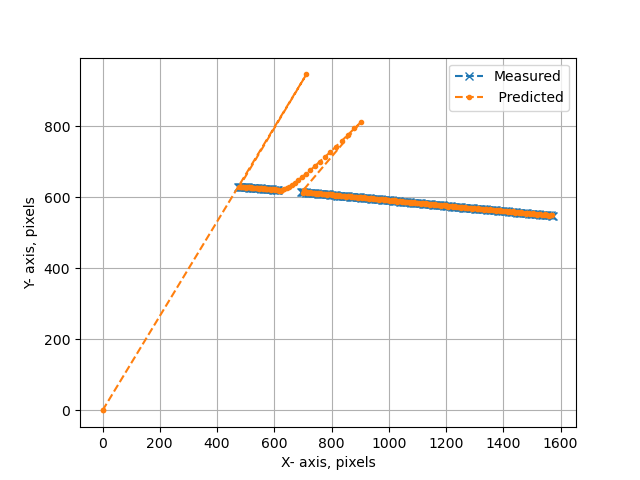

In [86]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Match['x0'], Match['y0'], '--x',label = 'Measured')
ax.plot(Match['x0_pred'], Match['y0_pred'], '--.', label = ' Predicted')
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')
ax.legend()

# 2.3Kalman Filter|Clear|Complex

In [87]:
Complex = pd.read_csv('D:/LETI/Course 6/Diplom/Compile_Calman+Tracker/Trajectories/Complex.csv')

In [88]:
Complex[40:60] = np.nan

In [89]:
plt.scatter(Complex['x0'], Complex['y0'])

In [90]:
Predicted = pd.DataFrame([[0, 0]],columns = ['x0_pred', 'y0_pred'])

In [91]:
kf = KF()

In [92]:
for i in range(0, len(Complex)-1,1):
    Predicted.loc[ len(Predicted.index )] = kf.predict()
    kf.update(Complex['x0'][i],Complex['y0'][i])

In [93]:
Match = pd.concat([Complex, Predicted], axis = 1, join='inner')

In [94]:
xMSE = (Match['x0'] - Match['x0_pred'])**2
yMSE = (Match['y0'] - Match['y0_pred'])**2
xRMSE = np.mean(np.sqrt(xMSE[21:]))
yRMSE = np.mean(np.sqrt(xMSE[21:]))
print('RMSE X-axis', xRMSE)
print('RMSE Y-axis', yRMSE)
print('RMSE' , (xRMSE + yRMSE)/2)

RMSE X-axis 3.455223880597015
RMSE Y-axis 3.455223880597015
RMSE 3.455223880597015


<IPython.core.display.Javascript object>


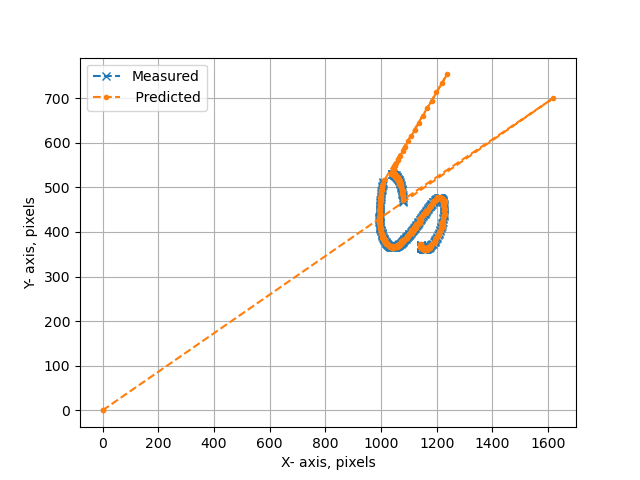

In [95]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Match['x0'], Match['y0'], '--x',label = 'Measured')
ax.plot(Match['x0_pred'], Match['y0_pred'], '--.', label = ' Predicted')
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')
ax.legend()

# Adding noise to  trajectory

In [96]:
Paraboloic = pd.read_csv('D:/LETI/Course 6/Diplom/Compile_Calman+Tracker/Trajectories/Paraboloic.csv')

In [97]:
NoiseX = np.random.normal(0, np.sqrt(100), (len(Paraboloic)))
NoiseY = np.random.normal(0, np.sqrt(100), (len(Paraboloic)))
Xnoise = Paraboloic['x0']+ NoiseX
Ynoise = Paraboloic['y0']+ NoiseY
ParabolicNoise = pd.concat([Xnoise, Ynoise], axis = 1, join='inner')

<IPython.core.display.Javascript object>


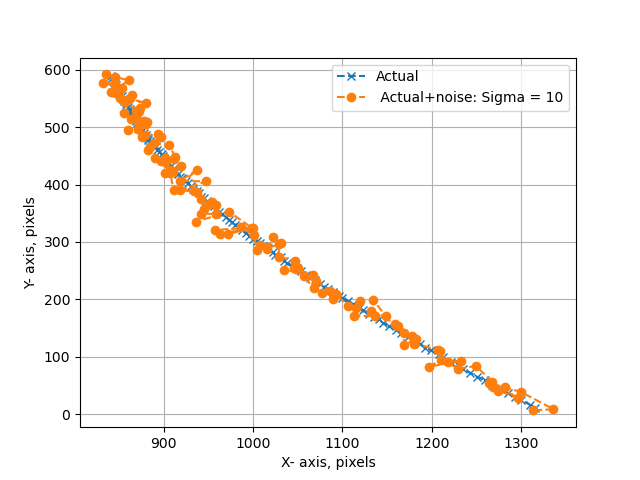

In [98]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Paraboloic['x0'], Paraboloic['y0'], '--x',label = 'Actual')
ax.plot(ParabolicNoise['x0'], ParabolicNoise['y0'], '--o', label = ' Actual+noise: Sigma = 10')
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')
ax.legend()

# 2.4Kalman|Sigma = 10|Parabolic|


In [99]:
NoiseX = np.random.normal(0, np.sqrt(100), (len(Paraboloic)))
NoiseY = np.random.normal(0, np.sqrt(100), (len(Paraboloic)))
Xnoise = Paraboloic['x0']+ NoiseX
Ynoise = Paraboloic['y0']+ NoiseY
ParabolicNoise = pd.concat([Xnoise, Ynoise], axis = 1, join='inner')

In [100]:
Predicted = pd.DataFrame([[0, 0]],columns = ['x0_pred', 'y0_pred'])

In [101]:
kf = KF()

In [102]:
for i in range(0, len(ParabolicNoise)-1,1):
    kf.update(ParabolicNoise['x0'][i],ParabolicNoise['y0'][i])
    Predicted.loc[ len(Predicted.index )] = kf.predict()
   


In [103]:
KalmanSigma10Parabolic = Predicted

In [104]:
Match = pd.concat([ParabolicNoise, Predicted], axis = 1, join='inner')

In [105]:
xMSE = (Paraboloic['x0'] - Match['x0_pred'])**2
yMSE = (Match['y0'] - Match['y0_pred'])**2
xRMSE = np.mean(np.sqrt(xMSE[21:]))
yRMSE = np.mean(np.sqrt(xMSE[21:]))
print('RMSE X-axis', xRMSE)
print('RMSE Y-axis', yRMSE)
print('RMSE' , (xRMSE + yRMSE)/2)

RMSE X-axis 22.46
RMSE Y-axis 22.46
RMSE 22.46


<IPython.core.display.Javascript object>


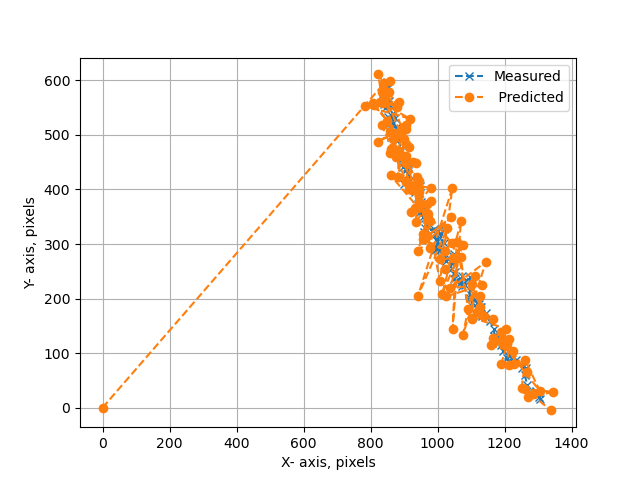

In [106]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Match['x0'], Match['y0'], '--x',label = 'Measured')
ax.plot(Match['x0_pred'], Match['y0_pred'], '--o', label = ' Predicted')
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')
ax.legend()

# 2.5 Kalman|Sigma = 10|Linear

In [107]:
Linear = pd.read_csv('D:/LETI/Course 6/Diplom/Compile_Calman+Tracker/Trajectories/Linear.csv')

In [108]:
NoiseX = np.random.normal(0, np.sqrt(100), (len(Linear)))
NoiseY = np.random.normal(0, np.sqrt(100), (len(Linear)))
Xnoise = Linear['x0']+ NoiseX
Ynoise = Linear['y0']+ NoiseY
LinearNoise = pd.concat([Xnoise, Ynoise], axis = 1, join='inner')

In [109]:
Predicted = pd.DataFrame([[0, 0]],columns = ['x0_pred', 'y0_pred'])

In [110]:
kf = KF()

In [111]:
for i in range(0, len(LinearNoise)-1,1):
    kf.update(LinearNoise['x0'][i],LinearNoise['y0'][i])
    Predicted.loc[ len(Predicted.index )] = kf.predict()

In [112]:
KalmanSigma10Linear = Predicted

In [113]:
Match = pd.concat([LinearNoise, Predicted], axis = 1, join='inner')

In [114]:
xMSE = (Linear['x0'] - Match['x0_pred'])**2
yMSE = (Match['y0'] - Match['y0_pred'])**2
xRMSE = np.mean(np.sqrt(xMSE[21:]))
yRMSE = np.mean(np.sqrt(xMSE[21:]))
print('RMSE X-axis', xRMSE)
print('RMSE Y-axis', yRMSE)
print('RMSE' , (xRMSE + yRMSE)/2)

RMSE X-axis 27.774058577405857
RMSE Y-axis 27.774058577405857
RMSE 27.774058577405857


<IPython.core.display.Javascript object>


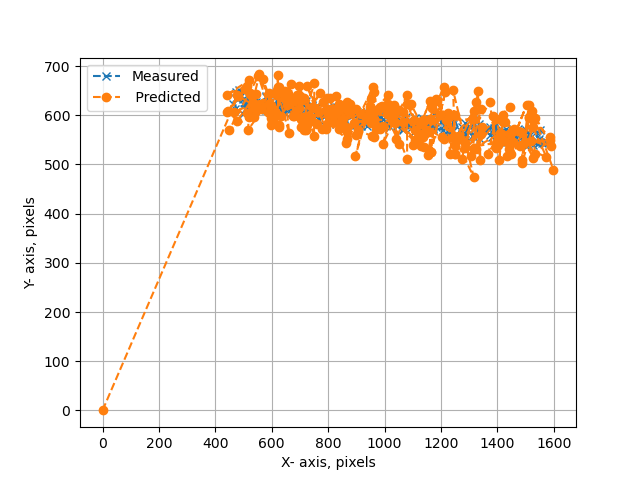

In [115]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Match['x0'], Match['y0'], '--x',label = 'Measured')
ax.plot(Match['x0_pred'], Match['y0_pred'], '--o', label = ' Predicted')
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')
ax.legend()

# 2.6Kalman|Sigma = 10|Complex

In [116]:
Complex = pd.read_csv('D:/LETI/Course 6/Diplom/Compile_Calman+Tracker/Trajectories/Complex.csv')

In [117]:
plt.scatter(Complex['x0'], Complex['y0'])

In [118]:
Predicted = pd.DataFrame([[0, 0]],columns = ['x0_pred', 'y0_pred'])

In [119]:
NoiseX = np.random.normal(0, np.sqrt(100), (len(Complex)))
NoiseY = np.random.normal(0, np.sqrt(100), (len(Complex)))
Xnoise = Complex['x0']+ NoiseX
Ynoise = Complex['y0']+ NoiseY
ComplexNoise = pd.concat([Xnoise, Ynoise], axis = 1, join='inner')

In [120]:
kf = KF()

In [121]:
for i in range(0, len(ComplexNoise)-1,1):
    kf.update(ComplexNoise['x0'][i],ComplexNoise['y0'][i])
    Predicted.loc[ len(Predicted.index )] = kf.predict()


In [122]:
KalmanSigma10Complex = Predicted

In [123]:
Match = pd.concat([ComplexNoise, Predicted], axis = 1, join='inner')

In [124]:
MSE = (Complex['x0'] - Match['x0_pred'])**2
RMSE = np.mean(np.sqrt(MSE[21:]))
print('RMSE between Actual & Predicted' , RMSE )

RMSE between Actual & Predicted 26.961805555555557


In [125]:
MSE = (Match['x0'] - Match['x0_pred'])**2
RMSE = np.mean(np.sqrt(MSE[21:]))
print('RMSE between Measured & Predicted' , RMSE )

RMSE between Measured & Predicted 27.94903894194792


<IPython.core.display.Javascript object>


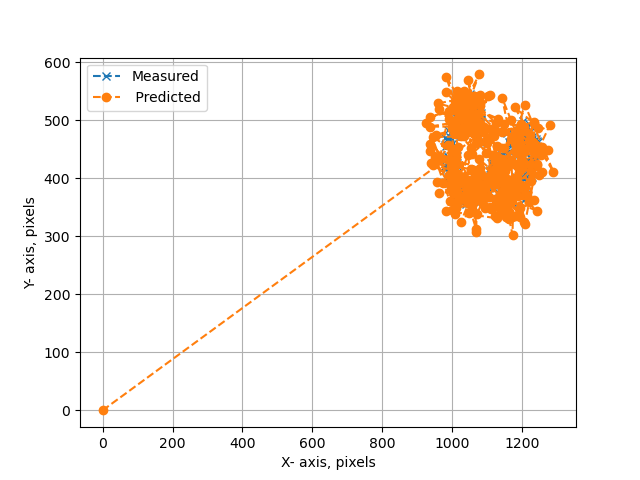

In [126]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Match['x0'], Match['y0'], '--x',label = 'Measured')
ax.plot(Match['x0_pred'], Match['y0_pred'], '--o', label = ' Predicted')

plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')
ax.legend()

# 3Kalman+Regression


In [243]:
class KF:
    fps = 25
    dt = 1 /fps
    ux = 1
    uy = 1
    sigma_a = 1
    sigma_x = 0.1
    sigma_y = 0.1
    F = np.array([[1, 0, dt, 0],
                  [0, 1, 0, dt],
                  [0, 0, 1, 0],
                  [0, 0, 0, 1]])
    B = np.array([[0.5 * (dt ** 2), 0],
                  [0, 0.5 * (dt ** 2)],
                  [dt, 0],
                  [0, dt]])
 
    Q = np.array([[(dt ** 4) / 4, 0, (dt ** 3) / 2, 0],
                  [0, (dt ** 4) / 4, 0, (dt ** 3) / 2],
                  [(dt ** 3) / 2, 0, (dt ** 2), 0],
                  [0, (dt ** 3) / 2, 0, (dt ** 2)]]) * sigma_a ** 2  # по сути ускорение
    P = np.array([[1000, 0, 0, 0],
                  [0, 1000, 0, 0],
                  [0, 0, 1000, 0],
                  [0, 0, 0, 1000]])   # Матрица ковариации
    R = np.array([[sigma_x ** 2, 0],
                  [0, sigma_y ** 2]])
    H = np.array([[1, 0, 0, 0],
                  [0, 1, 0, 0]])
    u = np.array([ux, uy]).reshape((2, 1))
    vel = np.array([1, 1]).reshape((2, 1))
    velpast = np.array([1, 1]).reshape((2, 1))
    zk = np.array([0, 0]).reshape((2, 1))
    xk = np.array([0., 0., 0., 0.]).reshape((4, 1))
    xkpast = np.array([0., 0., 0., 0.]).reshape((4, 1))
    
    n = 20
    a = n
    pointX = deque([1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1,],maxlen= n)
    pointY = deque([1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1],maxlen= n)
    timeStep = deque([0,1,2,3,4, 5,6,7,8,9, 10,11,12,13,14, 15,16,17,18,19], maxlen = n)
    past_x = 0
    past_y = 0

    def predict(self):
        # prediction
        self.xk = self.F @ self.xk + self.B @ self.u
        print('B',self.B)
        print('u',self.u)
        print('B @ u', self.B @ self.u)
        print('F @ xk', self.F @ self.xk)
        print('xk', self.xk)
    
        self.P = self.F @ self.P @ self.F.T + self.Q
        x, y = self.xk[0], self.xk[1]
        return np.array([int(np.round(x)), int(np.round(y))])
    

    def update(self, coordX, coordY):
        if np.isnan(coordX) | np.isnan(coordY) == True:
            return
        self.zk[0] = coordX  # X
        self.zk[1] = coordY  # Y
#         self.vel[0] = (self.zk[0] - self.xkpast[0]) /  self.dt  # velocityX
#         self.vel[1] = (self.zk[1] - self.xkpast[1]) /  self.dt  # velocityY
#         self.u[0] = (self.vel[0] - self.velpast[0]) /  self.dt  # accelerationX
#         self.u[1] = (self.vel[1] - self.velpast[1]) /  self.dt  # accelerationY

        # self.point_current[0] = coordX
        # self.point_current[1] = coordY
        self.yk = self.zk - self.H @ self.xk
        self.Sk = self.H @ self.P @ self.H.T + self.R
        self.K = self.P @ self.H.T @ np.linalg.inv(self.Sk)
    
        # update variables
        I = np.eye(self.H.shape[1])

        self.xk = self.xk + self.K @ self.yk
        self.P = (I - (self.K @ self.H)) @ self.P 
        
        
    def predictRg(self, x, y):
        
        if np.isnan(x) | np.isnan(y) == True:
            x = int(np.round(self.past_x))
            y = int(np.round(self.past_y))
        #UpdateCoordinateList
#         if self.a > 40:
#             x = int(abs(x + self.past_x)/2)
#             y = int(abs(y + self.past_y)/2)
#         if self.a > 40:
#             koeffx = math.exp(-0.01*(x-self.past_x)**2)
#             x = x*(1-koeffx)+self.past_x*(koeffx)
        
#             koeffy = math.exp(-0.01*(y-self.past_y)**2)
#             y = y*(1-koeffy)+self.past_y*(koeffy)

        self.pointX.append(x)
        print('X',self.pointX)
        
        self.pointY.append(y)
        print('Y',self.pointY)
        #Update timestepList
        self.timeStep.append(self.a)
        self.a+=1
        t11 = self.n
        t12 = np.sum( self.timeStep)
        t13 = np.sum(np.power( self.timeStep, 2, dtype = 'int64'))

        t21 = t12
        t22 = t13
        t23 = np.sum(np.power( self.timeStep, 3, dtype = 'int64'))

        t31 = t22
        t32 = t23
        t33 = np.sum(np.power( self.timeStep, 4, dtype = 'int64'))

        T = np.array([[t11, t12, t13],
                      [t21, t22, t23],
                      [t31, t32, t33]], dtype = 'int64')



        x11 = sum(self.pointX)
        x12 = sum(self.timeStep * np.array(self.pointX))
        x13 = sum(np.power(self.timeStep,2) * np.array(self.pointX))

        y11 = sum(self.pointY)
        y12 = sum(self.timeStep * np.array(self.pointY, dtype = 'int64'))
        y13 = sum(np.power(self.timeStep,2) * np.array(self.pointY, dtype = 'int64'))

        X = np.array([x11,
                    x12,
                    x13]).reshape((3,1))

        Y = np.array([y11,
                    y12,
                    y13]).reshape((3, 1))


        Bx = np.linalg.inv(T) @ X
        By = np.linalg.inv(T) @ Y
        #Filterin
        #drawing
        step = 1
        self.x_predict = Bx[0] + Bx[1] * (self.a) + Bx[2] * (self.a) ** 2
        self.y_predict = By[0] + By[1] * (self.a) + By[2] * (self.a)** 2
        self.past_x = self.x_predict
        self.past_y = self.y_predict
        self.u = np.array( [Bx[2],  By[2]])
      
        


# 3.1Kalman+Regression|Parabolic|Sigma = 10

In [128]:
Paraboloic = pd.read_csv('D:/LETI/Course 6/Diplom/Compile_Calman+Tracker/Trajectories/Paraboloic.csv')

In [129]:
Predicted = pd.DataFrame([[0, 0]],columns = ['x0_pred', 'y0_pred'])

In [130]:
NoiseX = np.random.normal(0, np.sqrt(100), (len(Paraboloic)))
NoiseY = np.random.normal(0, np.sqrt(100), (len(Paraboloic)))
Xnoise = Paraboloic['x0']+ NoiseX
Ynoise = Paraboloic['y0']+ NoiseY
ParabolicNoise = pd.concat([Xnoise, Ynoise], axis = 1, join='inner')

In [131]:
kf = KF()

In [132]:
for i in range(0, len(ParabolicNoise)-1,1):
    print('')
    print(kf.predictRg(ParabolicNoise['x0'][i],ParabolicNoise['y0'][i]))
    kf.update(ParabolicNoise['x0'][i],ParabolicNoise['y0'][i])
    Predicted.loc[ len(Predicted.index )] = kf.predict()


X deque([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 826.1663133432014], maxlen=20)
Y deque([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 601.9984963492284], maxlen=20)
None
B [[0.0008 0.    ]
 [0.     0.0008]
 [0.04   0.    ]
 [0.     0.04  ]]
u [[2.67911141]
 [1.95243132]]
B @ u [[0.00214329]
 [0.00156195]
 [0.10716446]
 [0.07809725]]
F @ xk [[8.25998170e+02]
 [6.00998676e+02]
 [1.07164456e-01]
 [7.80972527e-02]]
xk [[8.25993883e+02]
 [6.00995552e+02]
 [1.07164456e-01]
 [7.80972527e-02]]

X deque([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 826.1663133432014, 847.870096802619], maxlen=20)
Y deque([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 601.9984963492284, 596.5061160738046], maxlen=20)
None
B [[0.0008 0.    ]
 [0.     0.0008]
 [0.04   0.    ]
 [0.     0.04  ]]
u [[4.58265446]
 [3.27318049]]
B @ u [[0.00366612]
 [0.00261854]
 [0.18330618]
 [0.13092722]]
F @ xk [[ 888.38348726]
 [ 586.17717849]
 [ 518.96025906]
 [-123.13799618]]
xk [[ 8

In [133]:
Match = pd.concat([ParabolicNoise, Predicted], axis = 1, join='inner')

In [134]:
MSE = (Match['x0'] - Match['x0_pred'])**2
RMSE = np.mean(np.sqrt(MSE[21:]))
print('RMSE' , RMSE)

RMSE 9.700855675360623


In [135]:
MSE = (Paraboloic['x0'] - Match['x0_pred'])**2
RMSE = np.mean(np.sqrt(MSE[21:]))
print('RMSE' , RMSE)

RMSE 6.18


<IPython.core.display.Javascript object>


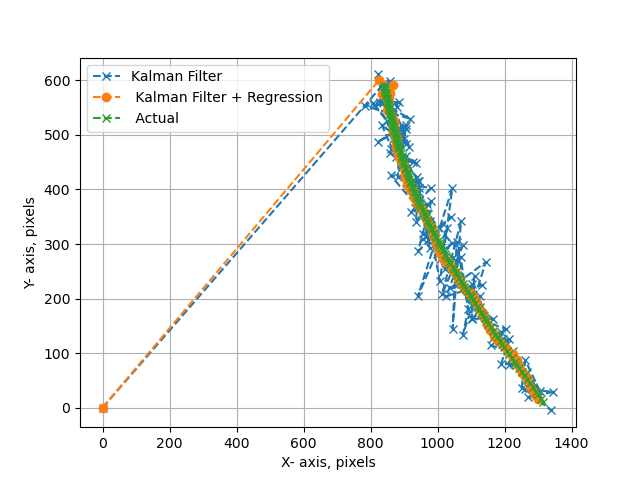

In [136]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(KalmanSigma10Parabolic['x0_pred'], KalmanSigma10Parabolic['y0_pred'], '--x',label = 'Kalman Filter')
ax.plot(Match['x0_pred'], Match['y0_pred'], '--o', label = ' Kalman Filter + Regression')
ax.plot(Paraboloic['x0'], Paraboloic['y0'], '--x', label = ' Actual')
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')
ax.legend()
#plt.plot(Src_Pred['x1'], Src_Pred['y1'])

# 3.2Kalman+Regression|Linear|Sigma = 10

In [137]:
Linear = pd.read_csv('D:/LETI/Course 6/Diplom/Compile_Calman+Tracker/Trajectories/Linear.csv')

In [138]:
Predicted = pd.DataFrame([[0, 0]],columns = ['x0_pred', 'y0_pred'])

In [139]:
kf = KF()

In [140]:
NoiseX = np.round(np.random.normal(0, np.sqrt(100), (len(Linear))))
NoiseY = np.round(np.random.normal(0, np.sqrt(100), (len(Linear))))
Xnoise = Linear['x0']+ NoiseX
Ynoise = Linear['y0']+ NoiseY
LinearNoise = pd.concat([Xnoise, Ynoise], axis = 1, join='inner')

In [141]:
for i in range(0, len(LinearNoise)-1,1):
    print('')
    print(kf.predictRg(LinearNoise['x0'][i],LinearNoise['y0'][i]))
    kf.update(LinearNoise['x0'][i],LinearNoise['y0'][i])
    Predicted.loc[ len(Predicted.index )] = kf.predict()



X deque([1166.8800491777401, 1177.7057018966884, 1202.547447485341, 1208.7452825534801, 1201.9517601939708, 1222.4238218252142, 1238.2617416166333, 1198.0202443237572, 1242.3524489557815, 1219.5993151647556, 1238.558548593961, 1247.0678217809168, 1271.1869630927565, 1249.375067495448, 1252.7810019574642, 1261.5227333863513, 1292.6982284745368, 1283.2729678885544, 1307.022387978318, 480.0], maxlen=20)
Y deque([140.1314226566227, 121.30246624656172, 131.46683418853758, 110.40546493294062, 122.30513945250475, 100.10228444901671, 116.78471941963232, 88.19006192551903, 97.09190764726631, 73.86581105537906, 64.72865301562246, 65.3760311782859, 75.55332238935637, 62.96640940593015, 52.750264620617656, 19.63450737730878, 31.3346122238812, 31.89297312425503, 11.557772993323777, 639.0], maxlen=20)
None
B [[0.0008 0.    ]
 [0.     0.0008]
 [0.04   0.    ]
 [0.     0.04  ]]
u [[-0.00486017]
 [-0.01036511]]
B @ u [[-3.88813314e-06]
 [-8.29209022e-06]
 [-1.94406657e-04]
 [-4.14604511e-04]]
F @ xk [

In [142]:
Match = pd.concat([LinearNoise, Predicted], axis = 1, join='inner')

In [143]:
MSE = (Linear['x0'] - Match['x0_pred'])**2
RMSE = np.mean(np.sqrt(MSE[21:]))
print('RMSE between Actual & Predicted Kal+ReG' , RMSE )

RMSE between Actual & Predicted Kal+ReG 3.564853556485356


In [144]:
MSE = (Linear['x0'] - KalmanSigma10Linear['x0_pred'])**2
RMSE = np.mean(np.sqrt(MSE[21:]))
print('RMSE between Actual & Predicted just Kal' , RMSE )

RMSE between Actual & Predicted just Kal 27.774058577405857


<IPython.core.display.Javascript object>


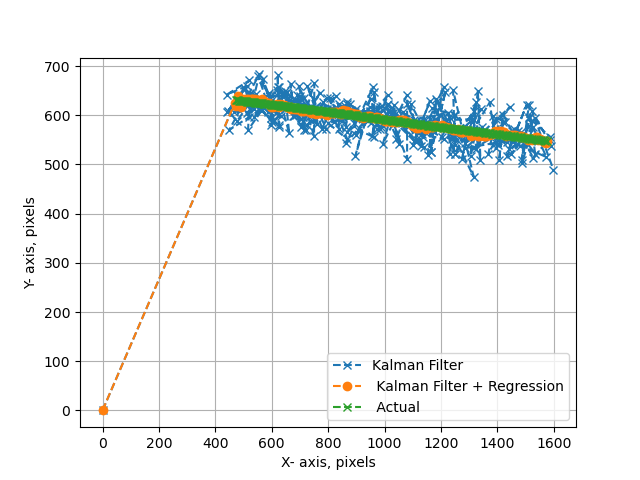

In [145]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(KalmanSigma10Linear['x0_pred'], KalmanSigma10Linear['y0_pred'], '--x',label = 'Kalman Filter')
ax.plot(Match['x0_pred'], Match['y0_pred'], '--o', label = ' Kalman Filter + Regression')
ax.plot(Linear['x0'], Linear['y0'], '--x', label = ' Actual')
# ax.plot(ComplexNoise['x0'], ComplexNoise['y0'], '--x', label = ' Measured')
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')
ax.legend()

# 3.3Kalman+Regression|Complex|Sigma = 10

In [146]:
Complex = pd.read_csv('D:/LETI/Course 6/Diplom/Compile_Calman+Tracker/Trajectories/Complex.csv')

In [147]:
Predicted = pd.DataFrame([[0, 0]],columns = ['x0_pred', 'y0_pred'])

In [148]:
kf = KF()

In [149]:
NoiseX = np.round(np.random.normal(0, np.sqrt(100), (len(Complex))))
NoiseY = np.round(np.random.normal(0, np.sqrt(100), (len(Complex))))
Xnoise = Complex['x0']+ NoiseX
Ynoise = Complex['y0']+ NoiseY
ComplexNoise = pd.concat([Xnoise, Ynoise], axis = 1, join='inner')

In [150]:
for i in range(0, len(ComplexNoise)-1,1):
    print('')
    print(kf.predictRg(ComplexNoise['x0'][i],ComplexNoise['y0'][i]))
    kf.update(ComplexNoise['x0'][i],ComplexNoise['y0'][i])
    Predicted.loc[ len(Predicted.index )] = kf.predict()





X deque([1459.0, 1481.0, 1496.0, 1500.0, 1519.0, 1493.0, 1523.0, 1516.0, 1524.0, 1536.0, 1514.0, 1525.0, 1540.0, 1550.0, 1553.0, 1550.0, 1566.0, 1564.0, 1577.0, 1081.0], maxlen=20)
Y deque([562.0, 556.0, 553.0, 549.0, 535.0, 557.0, 564.0, 543.0, 571.0, 561.0, 563.0, 553.0, 525.0, 558.0, 547.0, 553.0, 532.0, 537.0, 565.0, 470.0], maxlen=20)
None
B [[0.0008 0.    ]
 [0.     0.0008]
 [0.04   0.    ]
 [0.     0.04  ]]
u [[ 0.01375806]
 [-0.00336242]]
B @ u [[ 1.10064488e-05]
 [-2.68993529e-06]
 [ 5.50322442e-04]
 [-1.34496765e-04]]
F @ xk [[ 1.08098922e+03]
 [ 4.69995292e+02]
 [ 5.50322442e-04]
 [-1.34496765e-04]]
xk [[ 1.08098920e+03]
 [ 4.69995297e+02]
 [ 5.50322442e-04]
 [-1.34496765e-04]]

X deque([1481.0, 1496.0, 1500.0, 1519.0, 1493.0, 1523.0, 1516.0, 1524.0, 1536.0, 1514.0, 1525.0, 1540.0, 1550.0, 1553.0, 1550.0, 1566.0, 1564.0, 1577.0, 1081.0, 1074.0], maxlen=20)
Y deque([556.0, 553.0, 549.0, 535.0, 557.0, 564.0, 543.0, 571.0, 561.0, 563.0, 553.0, 525.0, 558.0, 547.0, 553.0, 532.0

In [151]:
Match = pd.concat([ComplexNoise, Predicted], axis = 1, join='inner')

In [152]:
MSE = (Complex['x0'] - Match['x0_pred'])**2
RMSE = np.mean(np.sqrt(MSE[21:]))
print('RMSE between Actual & Predicted Kal+ReG' , RMSE )

RMSE between Actual & Predicted Kal+ReG 3.6284722222222223


In [153]:
MSE = (Complex['x0'] - KalmanSigma10Complex['x0_pred'])**2
RMSE = np.mean(np.sqrt(MSE[21:]))
print('RMSE between Actual & Predicted just Kal' , RMSE )

RMSE between Actual & Predicted just Kal 26.961805555555557


In [154]:
MSE = (Match['x0'] - Match['x0_pred'])**2
RMSE = np.mean(np.sqrt(MSE[:]))
print('RMSE between Measured & Predicted' , RMSE )

RMSE between Measured & Predicted 12.728155339805825


<IPython.core.display.Javascript object>


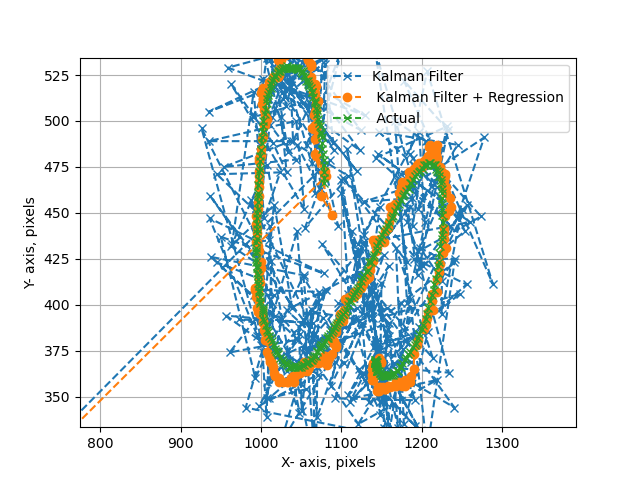

In [155]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(KalmanSigma10Complex['x0_pred'], KalmanSigma10Complex['y0_pred'], '--x',label = 'Kalman Filter')
ax.plot(Match['x0_pred'], Match['y0_pred'], '--o', label = ' Kalman Filter + Regression')
ax.plot(Complex['x0'], Complex['y0'], '--x', label = ' Actual')
# ax.plot(ComplexNoise['x0'], ComplexNoise['y0'], '--x', label = ' Measured')
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')
ax.legend()

# 4.1 Kalman+Regression|Paraboloic|LossData

In [156]:
kf = KF()

In [157]:
Paraboloic = pd.read_csv('D:/LETI/Course 6/Diplom/Compile_Calman+Tracker/Trajectories/Paraboloic.csv')

In [158]:
Paraboloic[40:60] = np.nan

In [159]:
Predicted = pd.DataFrame([[0, 0]],columns = ['x0_pred', 'y0_pred'])

In [160]:
for i in range(0, len(ParabolicNoise)-1,1):
    print('')
    print(kf.predictRg(Paraboloic['x0'][i],Paraboloic['y0'][i]))
    kf.update(Paraboloic['x0'][i],Paraboloic['y0'][i])
    Predicted.loc[ len(Predicted.index )] = kf.predict()


X deque([1148.0, 1160.0, 1161.0, 1156.0, 1147.0, 1129.0, 1157.0, 1151.0, 1154.0, 1154.0, 1147.0, 1151.0, 1142.0, 1136.0, 1152.0, 1166.0, 1146.0, 1139.0, 1149.0, 841.0], maxlen=20)
Y deque([371.0, 366.0, 371.0, 372.0, 361.0, 366.0, 369.0, 366.0, 365.0, 366.0, 384.0, 363.0, 367.0, 365.0, 365.0, 370.0, 363.0, 368.0, 370.0, 590.0], maxlen=20)
None
B [[0.0008 0.    ]
 [0.     0.0008]
 [0.04   0.    ]
 [0.     0.04  ]]
u [[-0.00466421]
 [ 0.00228208]]
B @ u [[-3.73136733e-06]
 [ 1.82566538e-06]
 [-1.86568366e-04]
 [ 9.12832689e-05]]
F @ xk [[ 8.40991579e+02]
 [ 5.89994106e+02]
 [-1.86568366e-04]
 [ 9.12832689e-05]]
xk [[ 8.40991586e+02]
 [ 5.89994102e+02]
 [-1.86568366e-04]
 [ 9.12832689e-05]]

X deque([1160.0, 1161.0, 1156.0, 1147.0, 1129.0, 1157.0, 1151.0, 1154.0, 1154.0, 1147.0, 1151.0, 1142.0, 1136.0, 1152.0, 1166.0, 1146.0, 1139.0, 1149.0, 841.0, 842.0], maxlen=20)
Y deque([366.0, 371.0, 372.0, 361.0, 366.0, 369.0, 366.0, 365.0, 366.0, 384.0, 363.0, 367.0, 365.0, 365.0, 370.0, 363.0, 3

In [161]:
Match = pd.concat([Paraboloic, Predicted], axis = 1, join='inner')

In [162]:
xMSE = (Match['x0'] - Match['x0_pred'])**2


In [163]:
xRMSE = np.mean(np.sqrt(xMSE[21:]))
yRMSE = np.mean(np.sqrt(xMSE[21:]))
xMSE = (Match['x0'] - Match['x0_pred'])**2
print('RMSE X-axis', xRMSE)
print('RMSE Y-axis', yRMSE)
print('RMSE' , (xRMSE + yRMSE)/2)

RMSE X-axis 4.8125
RMSE Y-axis 4.8125
RMSE 4.8125


<IPython.core.display.Javascript object>


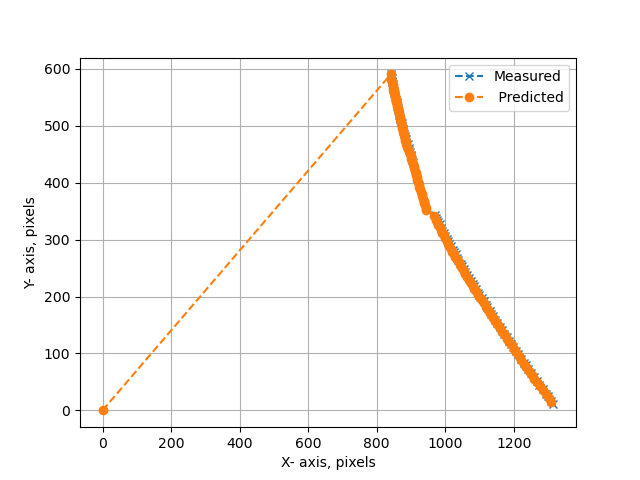

In [164]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Match['x0'], Match['y0'], '--x',label = 'Measured')
ax.plot(Match['x0_pred'], Match['y0_pred'], '--o', label = ' Predicted')
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')
ax.legend()
#plt.plot(Src_Pred['x1'], Src_Pred['y1'])

# 4.2 Kalman+Regression|Linear|LossData

In [165]:
kf = KF()

In [166]:
Linear = pd.read_csv('D:/LETI/Course 6/Diplom/Compile_Calman+Tracker/Trajectories/Linear.csv')

In [167]:
Linear[40:60] = np.nan

In [168]:
Predicted = pd.DataFrame([[0, 0]],columns = ['x0_pred', 'y0_pred'])

In [169]:
for i in range(0, len(Linear)-1,1):
    print('')
    print(kf.predictRg(Linear['x0'][i],Linear['y0'][i]))
    kf.update(Linear['x0'][i],Linear['y0'][i])
    Predicted.loc[ len(Predicted.index )] = kf.predict()


X deque([1173.0, 1180.0, 1187.0, 1193.0, 1199.0, 1208.0, 1213.0, 1222.0, 1230.0, 1235.0, 1243.0, 1251.0, 1260.0, 1267.0, 1275.0, 1285.0, 1293.0, 1300.0, 1310.0, 474.0], maxlen=20)
Y deque([134.0, 129.0, 122.0, 116.0, 111.0, 104.0, 99.0, 91.0, 84.0, 79.0, 72.0, 65.0, 59.0, 51.0, 45.0, 37.0, 29.0, 25.0, 16.0, 630.0], maxlen=20)
None
B [[0.0008 0.    ]
 [0.     0.0008]
 [0.04   0.    ]
 [0.     0.04  ]]
u [[ 0.00581377]
 [-0.01413707]]
B @ u [[ 4.65101995e-06]
 [-1.13096589e-05]
 [ 2.32550997e-04]
 [-5.65482945e-04]]
F @ xk [[ 4.73995274e+02]
 [ 6.29993666e+02]
 [ 2.32550997e-04]
 [-5.65482945e-04]]
xk [[ 4.73995265e+02]
 [ 6.29993689e+02]
 [ 2.32550997e-04]
 [-5.65482945e-04]]

X deque([1180.0, 1187.0, 1193.0, 1199.0, 1208.0, 1213.0, 1222.0, 1230.0, 1235.0, 1243.0, 1251.0, 1260.0, 1267.0, 1275.0, 1285.0, 1293.0, 1300.0, 1310.0, 474.0, 476.0], maxlen=20)
Y deque([129.0, 122.0, 116.0, 111.0, 104.0, 99.0, 91.0, 84.0, 79.0, 72.0, 65.0, 59.0, 51.0, 45.0, 37.0, 29.0, 25.0, 16.0, 630.0, 630.0]

In [170]:
Match = pd.concat([Linear, Predicted], axis = 1, join='inner')

In [171]:
xMSE = (Match['x0'] - Match['x0_pred'])**2

In [172]:
xRMSE = np.mean(np.sqrt(xMSE[21:]))
yRMSE = np.mean(np.sqrt(xMSE[21:]))
xMSE = (Match['x0'] - Match['x0_pred'])**2
print('RMSE X-axis', xRMSE)
print('RMSE Y-axis', yRMSE)
print('RMSE' , (xRMSE + yRMSE)/2)

RMSE X-axis 0.5114155251141552
RMSE Y-axis 0.5114155251141552
RMSE 0.5114155251141552


<IPython.core.display.Javascript object>


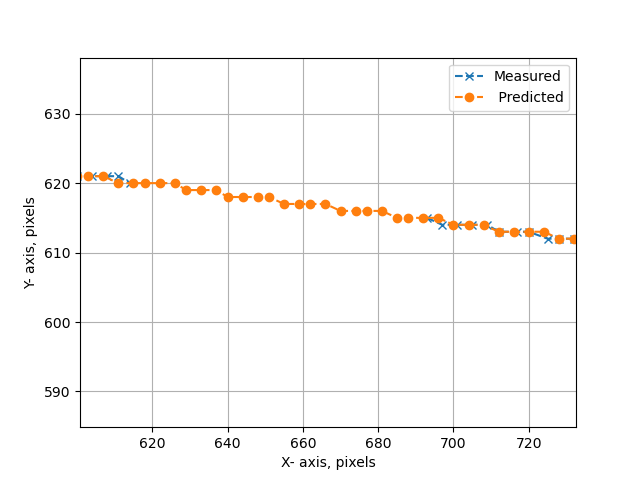

In [173]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Match['x0'], Match['y0'], '--x',label = 'Measured')
ax.plot(Match['x0_pred'], Match['y0_pred'], '--o', label = ' Predicted')
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')
ax.legend()
#plt.plot(Src_Pred['x1'], Src_Pred['y1'])

# 4.3 Kalman+Regression|Complex|LossData

In [244]:
kf = KF()

In [245]:
Complex = pd.read_csv('D:/LETI/Course 6/Diplom/Compile_Calman+Tracker/Trajectories/Complex.csv')

In [246]:
Complex['x0'][40] = 2000
Complex['y0'][40] = 2000

In [247]:
Complex.head(50)

x0    y0
0   1079   466
1   1079   469
2   1079   472
3   1078   476
4   1078   479
5   1077   482
6   1076   485
7   1076   488
8   1076   491
9   1075   493
10  1075   494
11  1074   497
12  1072   499
13  1071   501
14  1070   504
15  1070   506
16  1068   507
17  1067   510
18  1067   511
19  1065   513
20  1064   516
21  1063   516
22  1062   518
23  1060   519
24  1059   520
25  1058   522
26  1056   522
27  1055   524
28  1054   525
29  1052   527
30  1051   526
31  1050   527
32  1048   528
33  1046   528
34  1045   528
35  1044   529
36  1042   529
37  1040   529
38  1039   529
39  1038   529
40  2000  2000
41  1035   529
42  1033   530
43  1031   529
44  1030   529
45  1027   529
46  1027   529
47  1025   528
48  1024   527
49  1022   527

In [248]:
Predicted = pd.DataFrame([[0, 0]],columns = ['x0_pred', 'y0_pred'])

In [249]:
for i in range(0, len(Linear)-1,1):
    print('')
    print(kf.predictRg(Complex['x0'][i],Complex['y0'][i]))
    kf.update(Complex['x0'][i],Complex['y0'][i])
    Predicted.loc[ len(Predicted.index )] = kf.predict()


X deque([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1079], maxlen=20)
Y deque([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 466], maxlen=20)
None
B [[0.0008 0.    ]
 [0.     0.0008]
 [0.04   0.    ]
 [0.     0.04  ]]
u [[3.5       ]
 [1.50974026]]
B @ u [[0.0028    ]
 [0.00120779]
 [0.14      ]
 [0.06038961]]
F @ xk [[1.07899761e+03]
 [4.65998963e+02]
 [1.40000000e-01]
 [6.03896104e-02]]
xk [[1.07899201e+03]
 [4.65996548e+02]
 [1.40000000e-01]
 [6.03896104e-02]]

X deque([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1079, 1079], maxlen=20)
Y deque([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 466, 469], maxlen=20)
None
B [[0.0008 0.    ]
 [0.     0.0008]
 [0.04   0.    ]
 [0.     0.04  ]]
u [[5.89473684]
 [2.5524607 ]]
B @ u [[0.00471579]
 [0.00204197]
 [0.23578947]
 [0.10209843]]
F @ xk [[1.07904108e+03]
 [4.74925165e+02]
 [5.73070852e-01]
 [7.43218353e+01]]
xk [[1.07901816e+03]
 [4.71952292e+02]
 [5.73070852e-01]
 [7.43218353e+01]]

X dequ

In [250]:
Match = pd.concat([Complex, Predicted], axis = 1, join='inner')

In [251]:
xMSE = (Match['x0'] - Match['x0_pred'])**2

In [252]:
xRMSE = np.mean(np.sqrt(xMSE[21:]))
yRMSE = np.mean(np.sqrt(xMSE[21:]))
xMSE = (Match['x0'] - Match['x0_pred'])**2
print('RMSE X-axis', xRMSE)
print('RMSE Y-axis', yRMSE)
print('RMSE' , (xRMSE + yRMSE)/2)

RMSE X-axis 12.506276150627615
RMSE Y-axis 12.506276150627615
RMSE 12.506276150627615


<IPython.core.display.Javascript object>


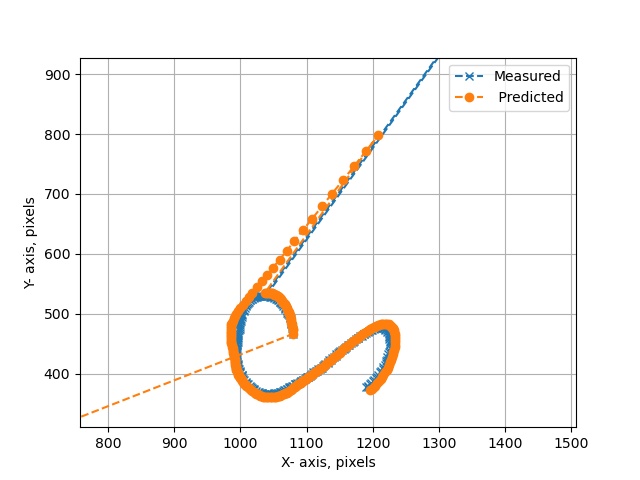

In [253]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(Match['x0'], Match['y0'], '--x',label = 'Measured')
ax.plot(Match['x0_pred'], Match['y0_pred'], '--o', label = ' Predicted')
plt.grid()
plt.xlabel('X- axis, pixels')
plt.ylabel('Y- axis, pixels')
ax.legend()
#plt.plot(Src_Pred['x1'], Src_Pred['y1'])

# 5.1 Regression|Выбросы

In [259]:
Paraboloic = pd.read_csv('D:/LETI/Course 6/Diplom/Compile_Calman+Tracker/Trajectories/Paraboloic.csv')

In [260]:
Paraboloic

x0   y0
0     841  590
1     842  586
2     844  583
3     844  579
4     846  576
..    ...  ...
116  1285   37
117  1293   29
118  1300   25
119  1310   16
120  1316   11

[121 rows x 2 columns]

In [269]:
s = Paraboloic.describe()

In [272]:
s

x0          y0
count   121.000000  121.000000
mean   1006.008264  330.685950
std     137.618161  166.339915
min     841.000000   11.000000
25%     885.000000  197.000000
50%     970.000000  343.000000
75%    1106.000000  476.000000
max    1316.000000  590.000000

In [273]:
s['x0']['50%']

970.0

In [275]:
pointX = deque([1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1],maxlen= 20)

In [278]:
np.array(pointX)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [282]:
df = pd.DataFrame(np.array(pointX))

In [281]:
df_describe.describe()

0
count  20.0
mean    1.0
std     0.0
min     1.0
25%     1.0
50%     1.0
75%     1.0
max     1.0